# Impact of Covid-19 on Economic Indicators in the Euro Zone

Authors: Anoushka Jain, Tajaldeep Singh Ahluwalia

## Abstract:

The objective of this report is to assess the impact of the Covid-19 pandemic on economic indicators in the countries of Germany, Greece, Spain, Italy and the Euro Zone. 
The indicators we will be selecting are: Inflation (CPI), Unemployment, GDP per capita, Foreign Direct Investment (FDI).
We will be using the Covid-19 dataset provided by the World Health Organisation and Our World in Data. The variables we shall be focusing on in that will be New cases, New deaths, Human Development Index, Median Age.....
We also aim to predict the economic indicators using Time series forecasting for the following year to see the possible impact of the pandemic.
As part of our analysis we would also explore the trends in the data.

## Introduction:

Inflation:
“Inflation is when you pay fifteen dollars for ten dollar haircut you used to get for five dollars when you had hair .” – Sam Ewing.

Inflation is the phenomenon of an increase in general price levels of goods and services. Consequently, the purchasing power of currency keeps falling. The reasons for inflation vary, ranging from excess money supply to national debt to exchange rates.

There are various types of inflation depending upon the speed it takes. Mild inflation is beneficial for the economy, which leads to an increase in demand and consumption as consumers buy now to beat future prices. An extreme form of inflation is stag inflation, wherein slow economic growth is coupled with  relatively high unemployment and rising inflation. At the other end of the spectrum lies hyperinflation, which is inflation increasing manifold times in a very short span of time. It erodes the real value of currency and causes people to minimize their holdings in that currency and switch to a more stable foreign currency. 

Unemployment:
The term unemployment refers to a situation when a person who is actively searching for employment is unable to find work. Unemployment is considered to be a key measure of the health of the economy. The most frequent measure of unemployment is the unemployment rate, which is the number of unemployed people divided by the number of people in the labor force.

GDP Per Capita:
Gross Domestic Product (GDP) Per capita is measures the economic output of a country per person and is a global measure to gauge the country's prosperity. It is calculated by dividing the GDP of a country by its population. GDP itself is the primary measure of a country's economic productivity. A country's GDP shows the market value of goods and services it produces.

Foreign Direct Investment (FDI):
Foreign direct investments (FDI) are substantial investments made by a company into a foreign concern. Generally, the term is used to describe a business decision to acquire a substantial stake in a foreign business or to buy it outright in order to expand its operations to a new region. It is not usually used to describe a stock investment in a foreign company. The investment may involve acquiring a source of materials, expanding a company's footprint, or developing a multinational presence. Thus it is a very important measure for economic prosperity in a country.

The reason we chose the countries Germany, Greece, Spain, Italy is that they were some of the worst hit countries in the Eurpoean Union during the pandemic. We would also like to do a comparison to the Euro Zone and see if there impact was above or below the average. Through our analysis we would like to see the economic situation in regards to these indicators of these countries.

## Literature Review

In [2]:
## Will add later

## Data Acquisition

##Loading the packages

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import missingno, os
from scipy.signal import savgol_filter

## Loading the datasets

In [3]:
# Data Sources

# WHO Global Covid Data

who_global = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
who_global.to_csv("raw_data/who_global.csv")

# Consumer Price Index (All items) 

cpi_eur = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CP0000EZ19M086NEST&scale=left&cosd=2016-10-01&coed=2021-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1996-01-01")
cpi_eur["Country"] = 'EURO' 
cpi_eur.columns.values[1] = "cpi"
cpi_eur.to_csv("raw_data/cpi_eur.csv")

cpi_de = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=DEUCPIALLMINMEI&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-01-01")
cpi_de["Country"] = 'Germany' 
cpi_de.columns.values[1] = "cpi"
cpi_de.to_csv("raw_data/cpi_de.csv")

cpi_ita = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ITACPIALLMINMEI&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-01-01")
cpi_ita["Country"] = 'Italy' 
cpi_ita.columns.values[1] = "cpi"
cpi_ita.to_csv("raw_data/cpi_ita.csv")

cpi_esp = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ESPCPIALLMINMEI&scale=left&cosd=2016-01-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-01-01")
cpi_esp["Country"] = 'Spain' 
cpi_esp.columns.values[1] = "cpi"
cpi_esp.to_csv("raw_data/cpi_esp.csv")

cpi_grc = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GRCCPIALLMINMEI&scale=left&cosd=2016-01-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-01-01")
cpi_grc["Country"] = 'Greece' 
cpi_grc.columns.values[1] = "cpi"
cpi_grc.to_csv("raw_data/cpi_grc.csv")

# Unemployment Rate (Harmonized, All persons)

unemp_eur = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRHUTTTTEZM156S&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1990-07-01")
unemp_eur["Country"] = 'EURO' 
unemp_eur.columns.values[1] = "unemp"
unemp_eur.to_csv("raw_data/unemp_eur.csv")

unemp_de = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRHUTTTTDEM156S&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1991-01-01")
unemp_de["Country"] = 'Germany' 
unemp_de.columns.values[1] = "unemp"
unemp_de.to_csv("raw_data/unemp_de.csv")

umemp_ita = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRHUTTTTITM156S&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1983-01-01")
umemp_ita["Country"] = 'Italy' 
umemp_ita.columns.values[1] = "unemp"
umemp_ita.to_csv("raw_data/umemp_ita.csv")

unemp_esp = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRHUTTTTESM156S&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1986-04-01")
unemp_esp["Country"] = 'Spain' 
unemp_esp.columns.values[1] = "unemp"
unemp_esp.to_csv("raw_data/unemp_esp.csv")

unemp_grc = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRHUTTTTGRM156S&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1998-04-01")
unemp_grc["Country"] = 'Greece' 
unemp_grc.columns.values[1] = "unemp"
unemp_grc.to_csv("raw_data/unemp_grc.csv")

# Normalised GDP 

gdp_eur = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=EA19LORSGPNOSTSAM&scale=left&cosd=2016-05-01&coed=2021-05-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-03-01")
gdp_eur["Country"] = 'EURO' 
gdp_eur.columns.values[1] = "gdp"
gdp_eur.to_csv("raw_data/gdp_eur.csv")

gdp_de = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=DEULORSGPNOSTSAM&scale=left&cosd=2016-08-01&coed=2021-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-02-01")
gdp_de["Country"] = 'Germany' 
gdp_de.columns.values[1] = "gdp"
gdp_de.to_csv("raw_data/gdp_de.csv")

gdp_ita = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ITALORSGPNOSTSAM&scale=left&cosd=2016-08-01&coed=2021-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-02-01")
gdp_ita["Country"] = 'Italy' 
gdp_ita.columns.values[1] = "gdp"
gdp_ita.to_csv("raw_data/gdp_ita.csv")

gdp_esp = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ESPLORSGPNOSTSAM&scale=left&cosd=2016-08-01&coed=2021-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-02-01")
gdp_esp["Country"] = 'Spain' 
gdp_esp.columns.values[1] = "gdp"
gdp_esp.to_csv("raw_data/gdp_esp.csv")

gdp_grc = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GRCLORSGPNOSTSAM&scale=left&cosd=2016-05-01&coed=2021-05-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-02-01")
gdp_grc["Country"] = 'Greece' 
gdp_grc.columns.values[1] = "gdp"
gdp_grc.to_csv("raw_data/gdp_grc.csv")


In [4]:
# combine the dataset for all countries based on feature

unemp = pd.concat([unemp_eur, unemp_de, umemp_ita, unemp_esp, unemp_grc], axis=0)
unemp.DATE = pd.to_datetime(unemp.DATE)

gdp = pd.concat([gdp_eur, gdp_de, gdp_ita, gdp_esp, gdp_grc], axis=0)
gdp.DATE = pd.to_datetime(gdp.DATE)

cpi = pd.concat([cpi_eur, cpi_de, cpi_ita, cpi_esp, cpi_grc], axis=0)
cpi.DATE = pd.to_datetime(cpi.DATE)

In [5]:
who_clean = who_global.copy()

who_clean['month'] = pd.to_datetime(who_clean['Date_reported']).dt.month
who_clean['year'] = pd.to_datetime(who_clean['Date_reported']).dt.year

who_clean['DATE'] = pd.to_datetime([f'{y}-{m}-1' for y, m in zip(who_clean.year, who_clean.month)])
who_clean = who_clean[["DATE","Country","WHO_region", "New_cases", "New_deaths"]]

who_clean = who_clean.groupby(["DATE","Country","WHO_region"]).agg({"New_cases":"sum", "New_deaths":"sum"}).reset_index()
who = who_clean[who_clean.Country.isin(["Germany", "Italy", "Greece", "Spain"])]


euro = who_clean.groupby(["DATE","WHO_region"]).agg({"New_cases":"sum", "New_deaths":"sum"}).reset_index()
euro["Country"] = "EURO"

euro = euro[["DATE", "Country", "WHO_region", "New_cases", "New_deaths"]]
euro = euro[euro.WHO_region == "EURO"]
euro

covid = pd.concat([euro, who], axis=0)

covid = covid[["DATE", "Country", "New_cases", "New_deaths"]]

<AxesSubplot:>

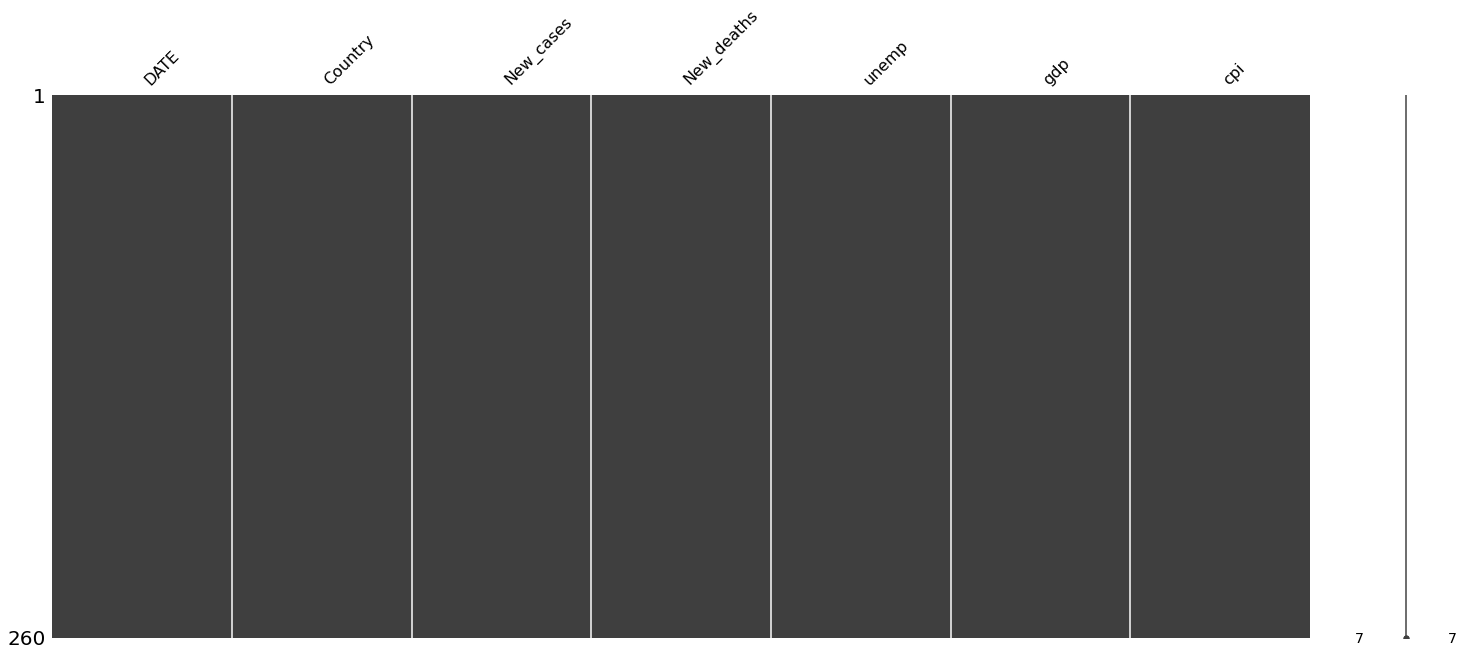

In [6]:
final_df = pd.merge(covid, unemp, how='outer', on=['DATE', 'Country'])
final_df = pd.merge(final_df, gdp, how='outer', on=['DATE', 'Country'])
final_df = pd.merge(final_df, cpi, how='outer', on=['DATE', 'Country'])

final_df.sort_values(by = ['Country', 'DATE'], ascending = True, inplace=True)

# replace null covid cases with 0
final_df["New_cases"].fillna(0, inplace=True)
final_df["New_deaths"].fillna(0, inplace=True)

# filter the dates with a timeframe
final_df = final_df[(final_df.DATE >= "2017-01-01") & (final_df.DATE <= "2021-04-01") ]

# inspect the dataframe
missingno.matrix(final_df)

Correlation Matrix
            New_cases  New_deaths     unemp       gdp       cpi
New_cases    1.000000    0.918071 -0.191146  0.050685  0.307377
New_deaths   0.918071    1.000000 -0.220815 -0.073389  0.314140
unemp       -0.191146   -0.220815  1.000000 -0.075148 -0.729321
gdp          0.050685   -0.073389 -0.075148  1.000000 -0.145379
cpi          0.307377    0.314140 -0.729321 -0.145379  1.000000


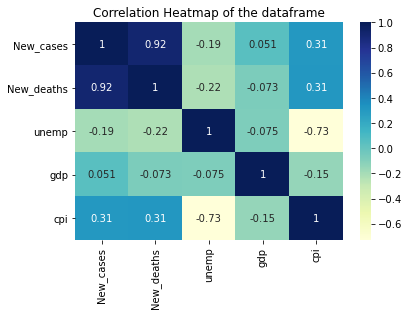

In [22]:
# select continous vars for heatmap

dt_clean_conti_vars = final_df.select_dtypes(include = ['float64', 'int64'])

dt_clean_conti_vars = dt_clean_conti_vars[dt_clean_conti_vars.New_cases > 0]

print("Correlation Matrix")
print(dt_clean_conti_vars.corr())

dataplot = sns.heatmap(dt_clean_conti_vars.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap of the dataframe")
plt.show()

## References:
1. Organization for Economic Co-operation and Development, Leading Indicators OECD: Reference series: Gross Domestic Product (GDP): Normalised